In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('marine_life_dataset.csv')

df.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Population,Water Temperature (°C),Nutrient Levels
count,1000.000000,1000.000000,1000.000000
mean,49.809000,24.980282,0.507339
std,28.396529,2.905684,0.227108
min,1.000000,20.017426,0.100145
25%,26.000000,22.482619,0.313938
50%,50.000000,24.785344,0.505267
75%,74.000000,27.505758,0.708002
max,99.000000,29.992590,0.899894


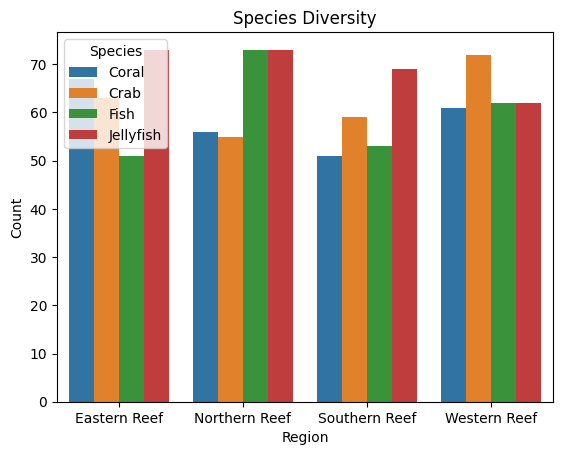

In [6]:
df_spec = df.groupby(['Region','Species']).size().reset_index(name='Count')

# df_spec.plot(kind='bar',x='Region',y='Count',)
sns.barplot(data=df_spec,x='Region',y='Count',hue='Species')
plt.title('Species Diversity')
plt.show()

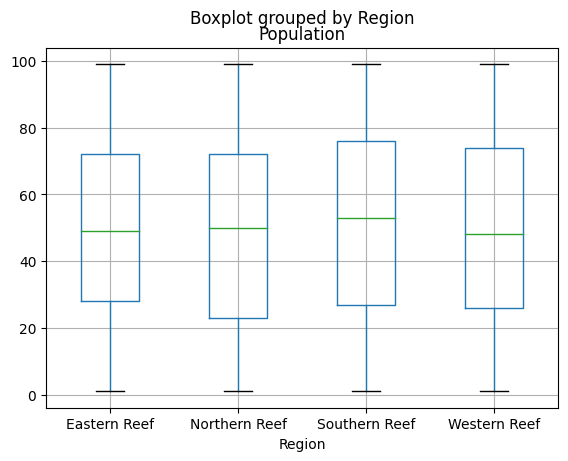

In [7]:
df.boxplot(by='Region',column='Population')
plt.show()

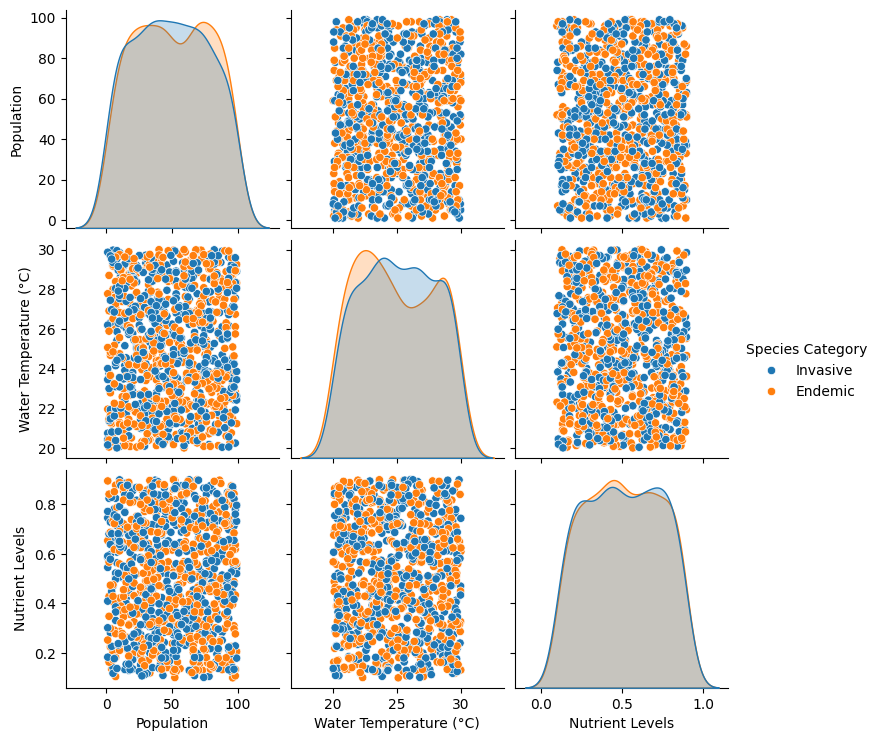

In [8]:
sns.pairplot(df,hue='Species Category')
plt.show()

In [9]:
df.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


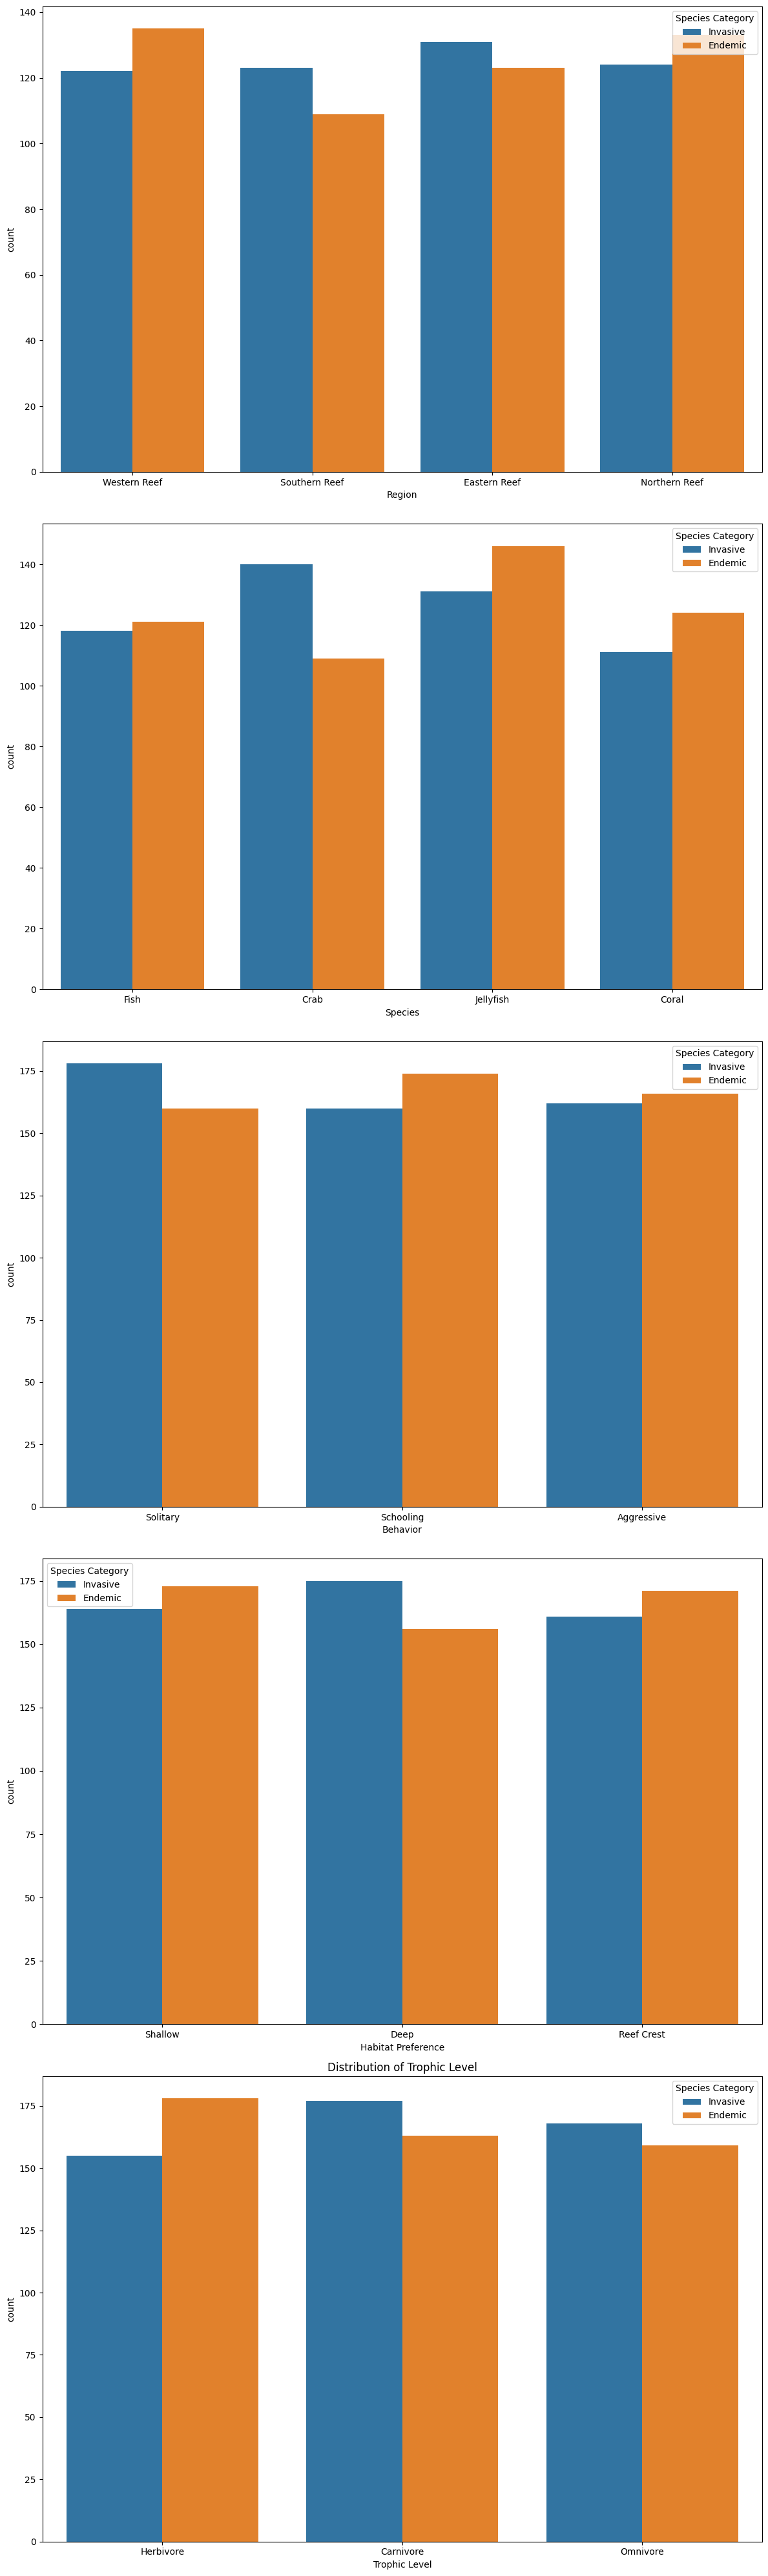

In [10]:
variables = ['Region','Species','Behavior','Habitat Preference', 'Trophic Level']

n_vars = len(variables)

fig, axes = plt.subplots(nrows=n_vars, figsize=(12,8*n_vars))

for i,var in enumerate(variables):
    ax = axes[i]
    sns.countplot(data=df,x=var,hue='Species Category', ax=ax)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()



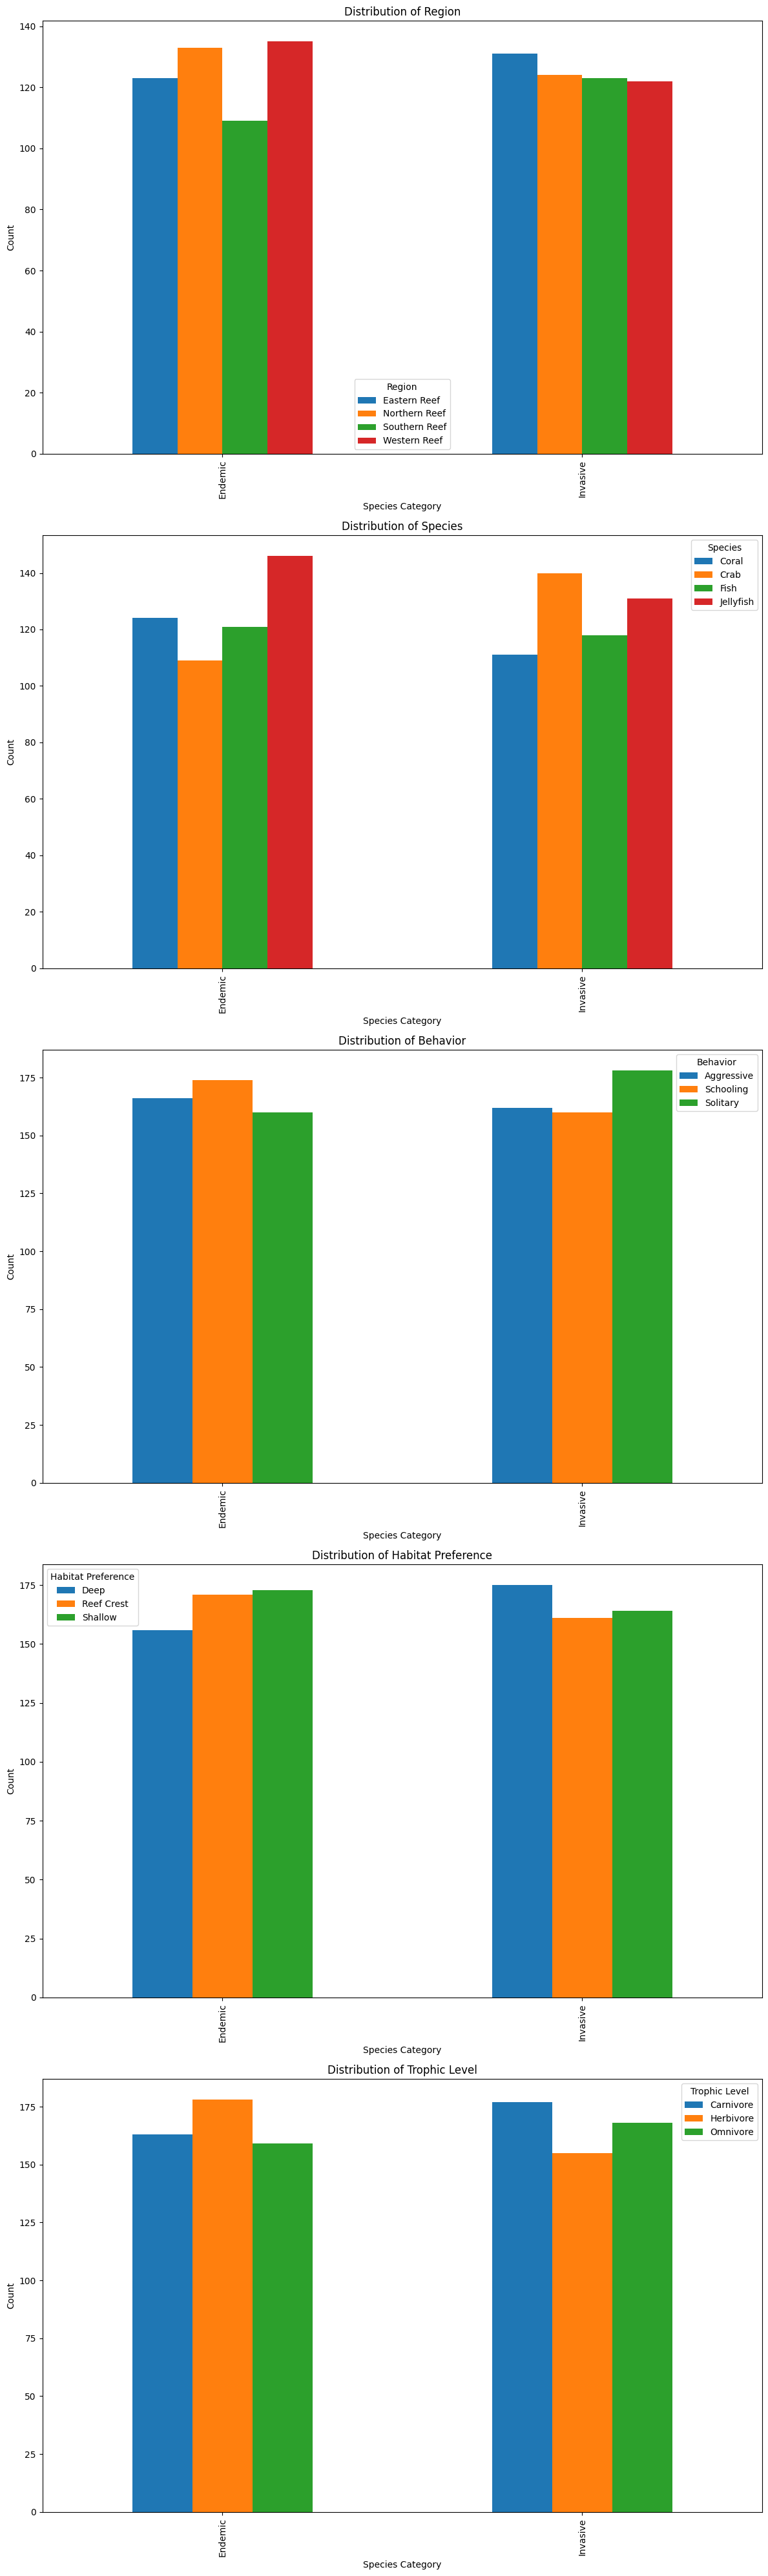

In [11]:
variables = ['Region','Species','Behavior','Habitat Preference', 'Trophic Level']

n_vars = len(variables)

fig, axes = plt.subplots(nrows=n_vars, figsize=(12,8*n_vars))

for i,var in enumerate(variables):
    ax = axes[i]
    df_grp = df.groupby('Species Category')[var].value_counts().unstack().reset_index()
    df_grp.set_index('Species Category').plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel('Species Category')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

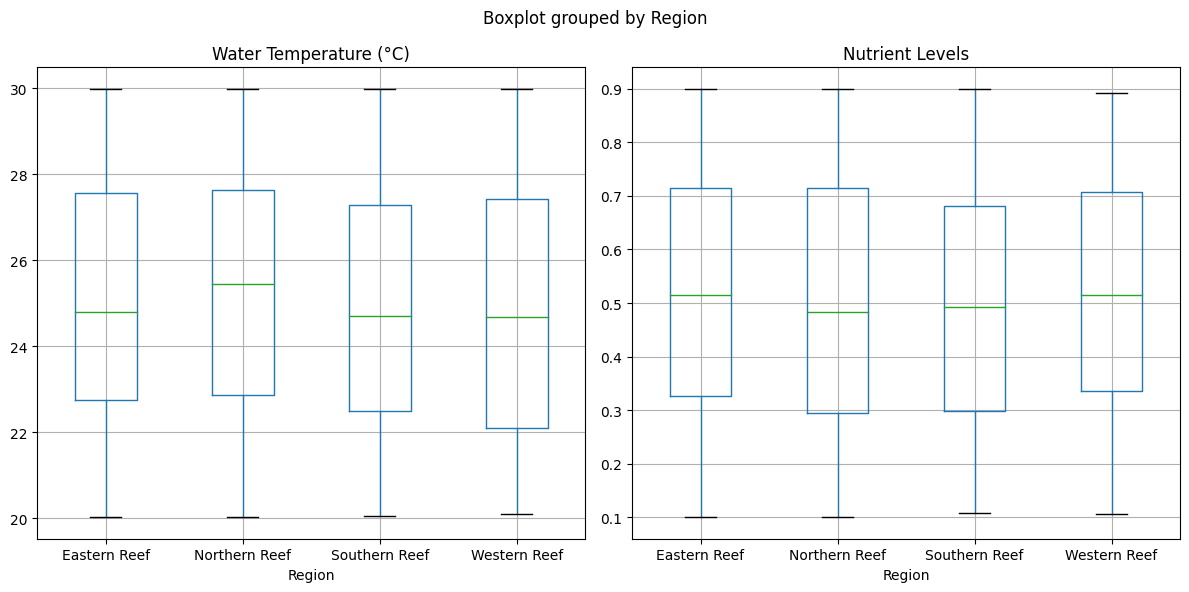

In [12]:
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

factors = ['Water Temperature (°C)', 'Nutrient Levels']

for i, fact in enumerate(factors):
    ax = axes[i]
    df.boxplot(column=fact, by='Region', ax=ax)
    # ax.set_title(f'{var} distribution')

plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [14]:
df['Species Category'].value_counts()

Species Category
Invasive    500
Endemic     500
Name: count, dtype: int64

In [15]:
df.duplicated().any()

False

In [16]:
df.drop_duplicates()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990
...,...,...,...,...,...,...,...,...,...
995,Southern Reef,Coral,9,Invasive,Schooling,Reef Crest,Carnivore,29.149126,0.238202
996,Western Reef,Crab,92,Invasive,Aggressive,Shallow,Omnivore,27.834154,0.465264
997,Eastern Reef,Crab,66,Endemic,Solitary,Deep,Omnivore,26.526336,0.213774
998,Northern Reef,Coral,28,Invasive,Aggressive,Deep,Omnivore,24.824243,0.686595


In [17]:
df['Species Category'].value_counts()

Species Category
Invasive    500
Endemic     500
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['Species Category'] = enc.fit_transform(df['Species Category'])

df['Species Category'].value_counts()

Species Category
1    500
0    500
Name: count, dtype: int64

In [19]:
df['Trophic Level'].value_counts()

Trophic Level
Carnivore    340
Herbivore    333
Omnivore     327
Name: count, dtype: int64

In [20]:
trophic_map = {
    'Herbivore': -1,
    'Omnivore': 0,
    'Carnivore': 1
}

df['Trophic Level'] = df['Trophic Level'].map(trophic_map)

df['Trophic Level'].value_counts()

Trophic Level
 1    340
-1    333
 0    327
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['Region','Species','Behavior','Habitat Preference'],dtype=int)
# df=df.astype(int)
df.head()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,33,1,-1,25.334903,0.306537,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,15,1,1,21.734394,0.421331,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2,8,1,1,25.429249,0.713816,1,0,0,0,0,0,0,1,0,1,0,1,0,0
3,78,1,1,27.366580,0.343183,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,61,0,-1,23.642494,0.349990,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [22]:
df['Region_Eastern Reef'].value_counts()

Region_Eastern Reef
0    746
1    254
Name: count, dtype: int64

In [23]:
df.describe()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.809000,0.50000,0.007000,24.980282,0.507339,0.254000,0.257000,0.23200,0.257000,0.235000,0.24900,0.239000,0.27700,0.32800,0.334000,0.338000,0.331000,0.332000,0.337000
std,28.396529,0.50025,0.820746,2.905684,0.227108,0.435515,0.437198,0.42232,0.437198,0.424211,0.43265,0.426686,0.44774,0.46972,0.471876,0.473265,0.470809,0.471167,0.472921
min,1.000000,0.00000,-1.000000,20.017426,0.100145,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,-1.000000,22.482619,0.313938,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,0.50000,0.000000,24.785344,0.505267,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.00000,1.000000,27.505758,0.708002,1.000000,1.000000,0.00000,1.000000,0.000000,0.00000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99.000000,1.00000,1.000000,29.992590,0.899894,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Population                     1000 non-null   int64  
 1   Species Category               1000 non-null   int32  
 2   Trophic Level                  1000 non-null   int64  
 3   Water Temperature (°C)         1000 non-null   float64
 4   Nutrient Levels                1000 non-null   float64
 5   Region_Eastern Reef            1000 non-null   int32  
 6   Region_Northern Reef           1000 non-null   int32  
 7   Region_Southern Reef           1000 non-null   int32  
 8   Region_Western Reef            1000 non-null   int32  
 9   Species_Coral                  1000 non-null   int32  
 10  Species_Crab                   1000 non-null   int32  
 11  Species_Fish                   1000 non-null   int32  
 12  Species_Jellyfish              1000 non-null   in

In [25]:
df['Population'].fillna(np.mean(df['Population']))

0      33
1      15
2       8
3      78
4      61
       ..
995     9
996    92
997    66
998    28
999    38
Name: Population, Length: 1000, dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Population','Water Temperature (°C)','Nutrient Levels']] = scaler.fit_transform(df[['Population','Water Temperature (°C)','Nutrient Levels']])

df.describe()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.498051,0.50000,0.007000,0.497521,0.509152,0.254000,0.257000,0.23200,0.257000,0.235000,0.24900,0.239000,0.27700,0.32800,0.334000,0.338000,0.331000,0.332000,0.337000
std,0.289761,0.50025,0.820746,0.291292,0.283974,0.435515,0.437198,0.42232,0.437198,0.424211,0.43265,0.426686,0.44774,0.46972,0.471876,0.473265,0.470809,0.471167,0.472921
min,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255102,0.00000,-1.000000,0.247133,0.267325,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.50000,0.000000,0.477979,0.506562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.744898,1.00000,1.000000,0.750698,0.760060,1.000000,1.000000,0.00000,1.000000,0.000000,0.00000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import FunctionTransformer

log_transform = FunctionTransformer(np.log1p, validate=True)

df[['Population','Water Temperature (°C)','Nutrient Levels']] = log_transform.fit_transform(df[['Population','Water Temperature (°C)','Nutrient Levels']])

df.describe()

,Population,Species Category,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,Region_Northern Reef,Region_Southern Reef,Region_Western Reef,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.384838,0.50000,0.007000,0.384361,0.393218,0.254000,0.257000,0.23200,0.257000,0.235000,0.24900,0.239000,0.27700,0.32800,0.334000,0.338000,0.331000,0.332000,0.337000
std,0.198596,0.50025,0.820746,0.198962,0.193497,0.435515,0.437198,0.42232,0.437198,0.424211,0.43265,0.426686,0.44774,0.46972,0.471876,0.473265,0.470809,0.471167,0.472921
min,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227217,0.00000,-1.000000,0.220846,0.236908,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.405465,0.50000,0.000000,0.390676,0.409830,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.556696,1.00000,1.000000,0.560014,0.565348,1.000000,1.000000,0.00000,1.000000,0.000000,0.00000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.693147,1.00000,1.000000,0.693147,0.693147,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

X = df.drop(columns='Species Category')
y= df['Species Category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(f"Number of samples in X_train: {X_train.shape[0]}")
print(f"Number of samples in X_test: {X_test.shape[0]}")
print(f"Number of samples in y_train: {y_train.shape[0]}")
print(f"Number of samples in y_test: {y_test.shape[0]}")

param_grid = {
    'C': [0.1,1,100],
    'penalty':['l1','l2'],
    'max_iter':[100,500,1000],
    'solver': ['lbfgs', 'liblinear','sag','saga']
}

grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

est = grid.best_estimator_

y_pred = est.predict(X_test)

print(classification_report(y_test,y_pred))

Number of samples in X_train: 700
Number of samples in X_test: 300
Number of samples in y_train: 700
Number of samples in y_test: 300


C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

LogisticRegression(C=1, penalty='l1', solver='saga')
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.5471428571428572
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       146
           1       0.53      0.49      0.51       154

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

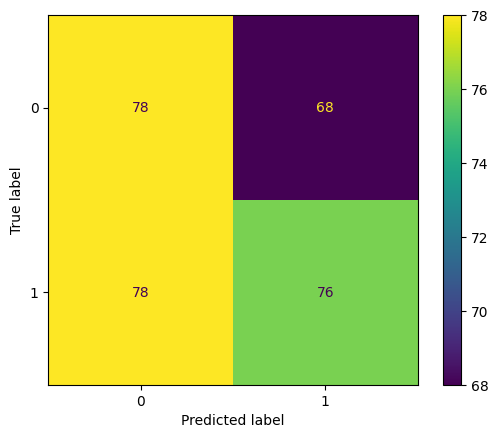

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=est.classes_)

disp.plot()
plt.show()

<Axes: >

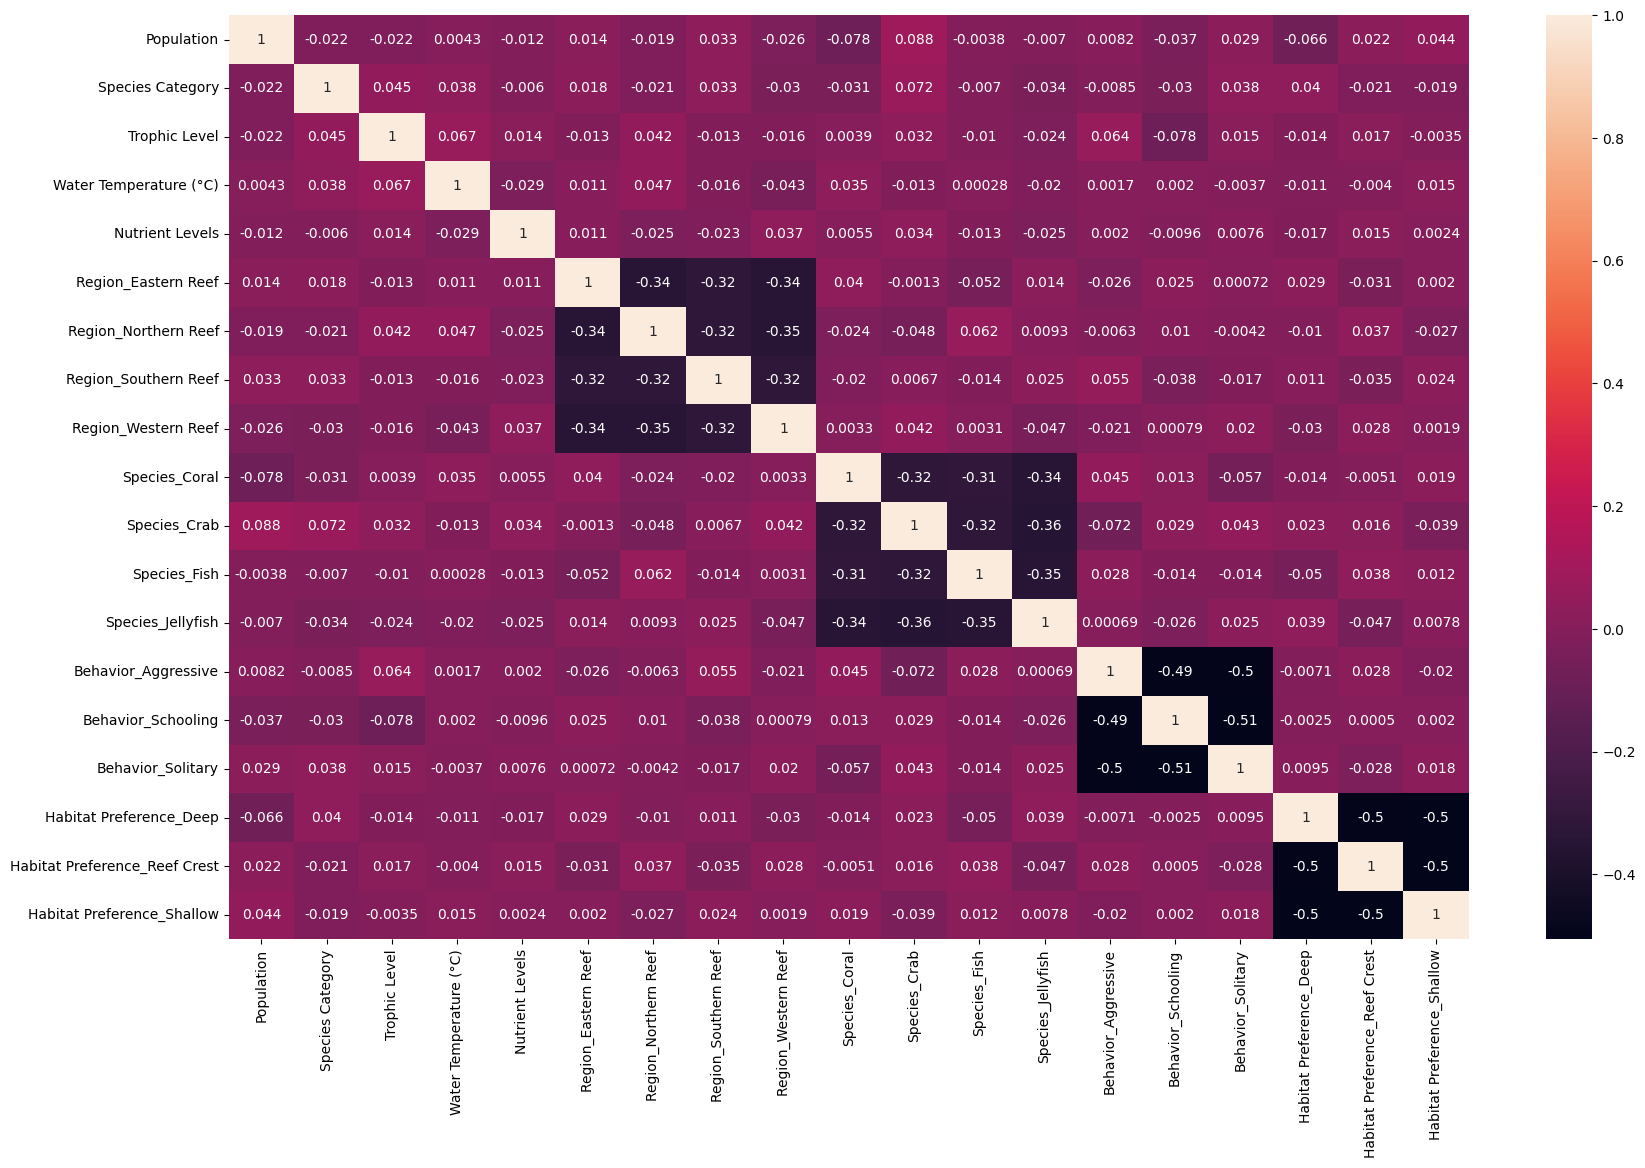

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)